In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import os

In [10]:
def cosineSimBin(portf1, portf2): #change from .stocks array to the weightdata arrays from objects
    """
    takes two portfolio objects and finds binary overlap between them
    NUMPY

    """
    overlapWeights = 0
    for i in portf1.stocks:
        if i in portf2.stocks: # stock in portf1 and portf2
            overlapWeights += 1 # binary stock overlap

    portf1stocks = np.ones(len(portf1.stocks))
    portf2stocks = np.ones(len(portf2.stocks))
    portf1Norm = np.linalg.norm(portf1stocks)
    portf2Norm = np.linalg.norm(portf2stocks)
    
    return overlapWeights/(portf1Norm*portf2Norm)

In [88]:
files = os.listdir('./results/nopricechange/7-9/')

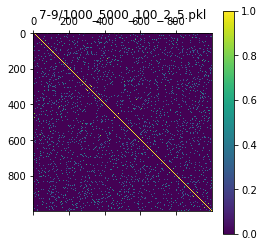

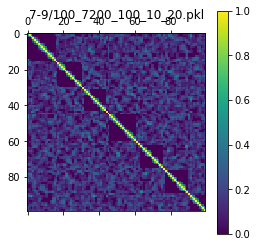

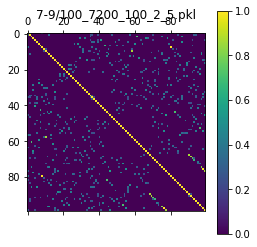

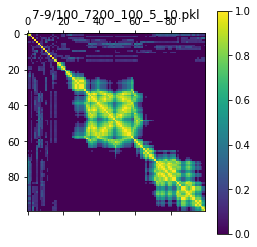

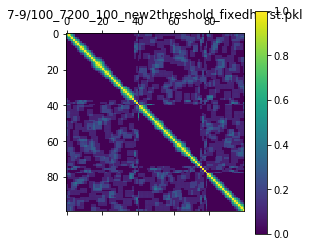

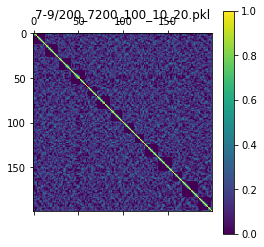

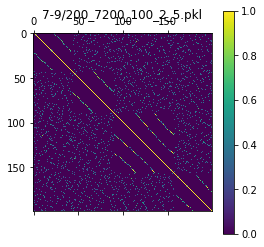

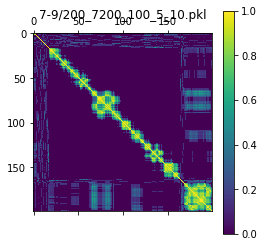

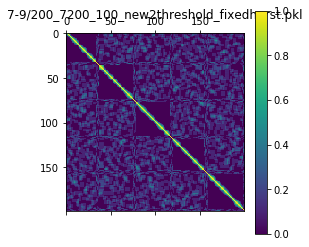

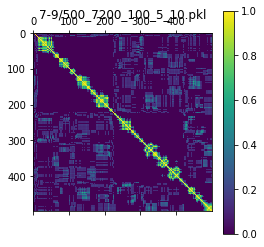

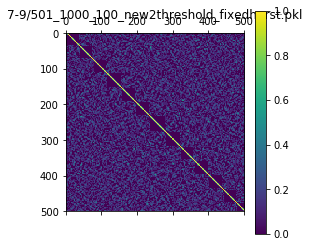

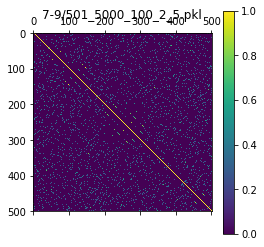

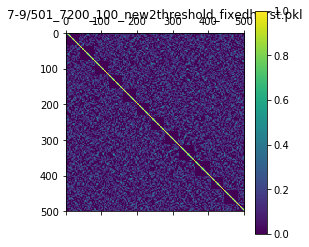

In [83]:
simps = pd.DataFrame() 

for f in sorted(files):
    if "traderIDs" in f:
        with open('./results/nopricechange/7-9/'+f, 'rb') as fi:
            traderIDsNPC = pickle.load(fi)
            
        cosSimBin = np.empty((len(traderIDsNPC),len(traderIDsNPC)))
        portfs = list(traderIDsNPC.values())
        for i in range(len(traderIDsNPC)):
            for j in range(len(traderIDsNPC)):
                cosSimBin[i][j] = cosineSimBin(portfs[i], portfs[j])
        
        plt.matshow(cosSimBin)
        plt.colorbar()
        plt.title('7-9/'+f[10:])
        plt.savefig('7-9_'+f[:-4]+'.png', dpi=200)
        plt.show()
        
        simps = simps.append(pd.DataFrame([['7-9/'+f,  np.mean(cosSimBin)]], columns = ['filename', 'mean binary cosim']))

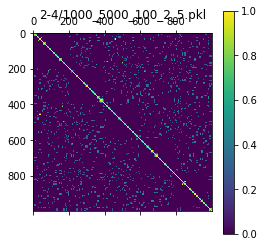

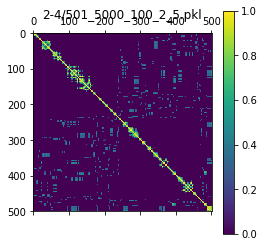

In [84]:
files = os.listdir('./results/nopricechange/2-4/') 

for f in sorted(files):
    if "traderIDs" in f:
        with open('./results/nopricechange/2-4/'+f, 'rb') as fi:
            traderIDsNPC = pickle.load(fi)
            
        cosSimBin = np.empty((len(traderIDsNPC),len(traderIDsNPC)))
        portfs = list(traderIDsNPC.values())
        for i in range(len(traderIDsNPC)):
            for j in range(len(traderIDsNPC)):
                cosSimBin[i][j] = cosineSimBin(portfs[i], portfs[j])
        
        plt.matshow(cosSimBin)
        plt.colorbar()
        plt.title('2-4/'+f[10:])
        plt.savefig('2-4_'+f[:-4]+'.png', dpi=200)
        plt.show()
        
        simps = simps.append(pd.DataFrame([['2-4/'+f,  np.mean(cosSimBin)]], columns = ['filename', 'mean binary cosim']))

In [89]:
simps

,filename,mean binary cosim
0,7-9/traderIDs_1000_5000_100_2_5.pkl,0.029630
0,7-9/traderIDs_100_7200_100_10_20.pkl,0.143874
0,7-9/traderIDs_100_7200_100_2_5.pkl,0.033040
0,7-9/traderIDs_100_7200_100_5_10.pkl,0.171746
0,7-9/traderIDs_100_7200_100_new2threshold_fixed...,0.105930
0,7-9/traderIDs_200_7200_100_10_20.pkl,0.145308
0,7-9/traderIDs_200_7200_100_2_5.pkl,0.031307
0,7-9/traderIDs_200_7200_100_5_10.pkl,0.092004
0,7-9/traderIDs_200_7200_100_new2threshold_fixed...,0.101479
0,7-9/traderIDs_500_7200_100_5_10.pkl,0.077721
